### **Tarea Semana 08: EDP**
#### IF4702 - Física Computacional I
#### Valeria Bonilla Rojas (2018254434)
#### María Fernanda Quesada Mena (2020036474)

In [ ]:
# Importación de librerías
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from scipy import integrate

### **Método 1: Cálculo mediante series de Fourier**

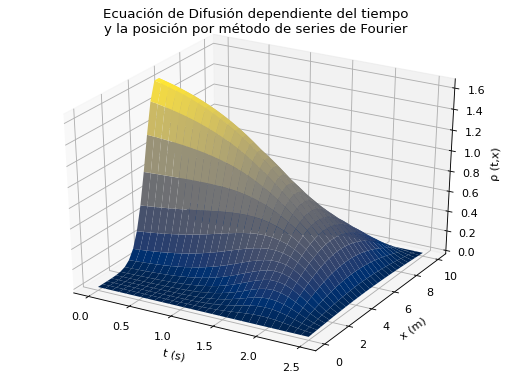

In [ ]:
def CalculoDifusiónInicial (x, x0, l, A):
    """
    Se realiza el cálculo inicial de la difusión con t=0 s
    
    Parámetros de la función:
    ------------------------
    x: Posición en el eje X.
    x0, l, A: Constantes definidas para el problema
    
    Salida de la función
    ---------------------
    Valor de la difusión inicial en x y t
    """
    #Con la función descrita
    DifusionInicial = A * np.exp (-(x0 - x) ** 2 / l)

    return  DifusionInicial

def CalculoCoeficienteCn (i, lado, x, x0, l, A):
    """
    Se realiza el cálculo del coeficiente de la serie de Fourier.
    
    Parámetros de la función:
    ------------------------
    i: n para la serie de Fourier (contador)
    x: Posiciones en el eje x
    lado, x0, l, A: Constantes definidas para el problema
    
    Salida de la función
    ---------------------
    Valor del coeficiente de la serie de fourier para n
    """  

    funciónIntegrar = lambda x: 2/lado * CalculoDifusiónInicial (x, x0, l, A) * np.sin (i * np.pi * x / lado)

    coeficienteCn =  integrate.quad (funciónIntegrar, 0, lado) [0]

    return coeficienteCn

def CalculoDifusión (t, x, tamañoLado, númeroTérminos, x0, l, A, D):
    """
    Parámetros de la función:
    ------------------------
    x: Posiciones en el eje x
    t: Puntos en el eje del tiempo
    tamañoLado: Tamaño del lado para el eje x
    númeroTérminos: Número de términos para la serie final
    x0, l, A, D: Constantes definidas para el problema
    
    Salida de la función
    ---------------------
    Valor aproximado de la ecuación de difusión en una dimensión
    """

    potencialAproximado = 0

    for iContador in range (1, númeroTérminos+1):

        coeficiente = CalculoCoeficienteCn (iContador, tamañoLado, x, x0, l, A)
        potencialAproximado += coeficiente*np.sin(iContador*np.pi*x/tamañoLado)*np.exp(-D*iContador**2*np.pi**2**t/tamañoLado**2)

    return potencialAproximado

# Se definen las variables para resolver el problema
tamañoLado = 10
puntosTiempo = 2.5
númeroTérminos = 20
x0 = 5.0
l = 1.5
A = 2.0
D = 0.5

# Se definen los puntos en los que se va a evaluar la ecuación
puntosMalla = 30
x = np.seterr(over="ignore")
t = np.linspace (0, puntosTiempo, puntosMalla)
x = np.linspace (0, tamañoLado, puntosMalla)
T, X = np.meshgrid (t, x)


# Se realiza el cálculo de la ecuación de difusión unidimensional
difusiónFinal = CalculoDifusión(T, X, tamañoLado, númeroTérminos, x0, l, A, D)

# Se grafican los resultados
fig = plt.figure (figsize=(8, 6), dpi=80)
ax = plt.axes (projection = '3d')    
ax.set_title (r"Ecuación de Difusión dependiente del tiempo"
"\n" 
r"y la posición por método de series de Fourier")   
ax.set_xlabel ('t (s)')
ax.set_ylabel ('x (m)')
ax.set_zlabel ('ρ (t,x)')
ax.plot_surface (T, X, difusiónFinal, rstride=1, cstride=1, cmap= 'cividis', edgecolor ='none')

### **Método 2: Cálculo mediante diferencias finitas**

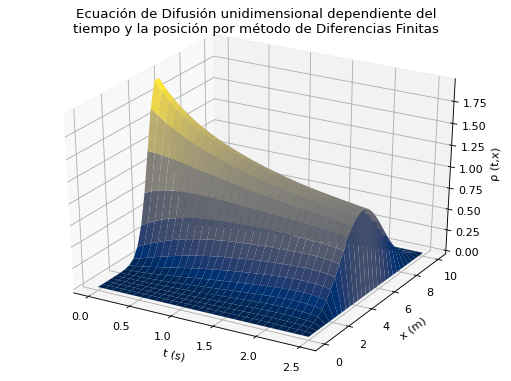

In [ ]:
def CalculoDifusiónInicialTiempo (matrizDifusiónInicial, puntosMalla, x, A, x0, l):
    """
    Se realiza el cálculo inicial de la difusión con t=0 s.
    
    Parámetros de la función:
    ------------------------
    x: Posición en el eje X.
    x0, l, A: Constantes definidas para el problema.
    
    Salida de la función
    ---------------------
    Matriz de la difusión inicial en x y t
    """
    for i in range (0, puntosMalla):
        matrizDifusiónInicial [i][0] = A * np. exp (-(x[i] - x0) ** 2 / l)
    else:
        return matrizDifusiónInicial


def CalculoDifusión (matrizDifusión, precisión, puntosMalla, tamañoLado, puntosTiempo, D):
    """
    Parámetros de la función:
    ------------------------
    matrizDifusión: Matriz donde se almacenan los valores de tiempo y 
    posición variables para cada iteración. 
    presición: Presición definida para el problema.
    puntosMalla: Puntos que existen para cada eje.
    tamañoLado: Recorrido de la posición de la ecuación.
    puntosTiempo: Tiempo total.
    D: Constante definida por problema. 
    
    Salida de la función
    ---------------------
    Matriz de difusión variable en el tiempo y posición.
    """
    # Se define el inicio del contador de iteraciones 
    contadorIteraciones = 0
    # Se define un contador que lleve la cantidad de veces que no se cumple la presición deseada.
    cantidadImprecisiones = 1
    
    #Se define un ciclo que funcione hasta que deje de cumplirse la presición.
    while cantidadImprecisiones > 0:
        contadorIteraciones += 1
        cantidadImprecisiones = 0
    
        for contadorPosición in range (1, puntosMalla - 1):
            for contadorTiempo in range (0, puntosMalla - 2):

                difusiónAnterior = matrizDifusión [contadorPosición][contadorTiempo+1]
                gamma = D*puntosTiempo/puntosMalla*(puntosMalla/tamañoLado)**2
                matrizDifusión[contadorPosición][contadorTiempo+1] = matrizDifusión [contadorPosición][contadorTiempo] + \
                gamma * (matrizDifusión[contadorPosición+1][contadorTiempo]+matrizDifusión[contadorPosición-1][contadorTiempo]-2*matrizDifusión [contadorPosición][contadorTiempo])
                #Se calcula la diferencia entre la difusión anterior y la actual
                diferenciaDifusión = np.abs(difusiónAnterior - matrizDifusión[contadorPosición][contadorTiempo+1])     

                #Se plantea la condición de parada con la presición deseada y la diferencia de difusión           
                if diferenciaDifusión > precisión:
                    cantidadImprecisiones += 1
                if contadorIteraciones > 500:
                    cantidadImprecisiones = 0
               
    return matrizDifusión, contadorIteraciones

# Se definen las variables para resolver el problema
tamañoLado = 10
puntosTiempo = 2.5
precisión = 0.1
x0 = 5.0
l = 1.5
A = 2.0
D = 0.5

# Se definen los puntos en los que se va a evaluar la ecuación
puntosMalla = 30
t = np.linspace (0, puntosTiempo, puntosMalla)
x = np.linspace (0, tamañoLado, puntosMalla)
T, X = np.meshgrid (t,x)

# Se crea una matriz de ceros del tamaño antes definido
matrizDifusiónInicial = np.zeros ((puntosMalla, puntosMalla))

# Se modifican los valores para el tiempo inicial
matrizDifusiónInicial = CalculoDifusiónInicialTiempo (matrizDifusiónInicial, puntosMalla, x, A, x0, l)    

# Se realiza el cálculo de la ecuación
resultadoFinal = CalculoDifusión (matrizDifusiónInicial, precisión, puntosMalla, tamañoLado, puntosTiempo, D) 
    
# Se definen las variables que contienen los resultados
difusiónFinal =  resultadoFinal [0]
iteracionesTotales = resultadoFinal [1]
    
# Se grafican los resultados
fig = plt.figure (figsize=(8, 6), dpi=80)
ax = plt.axes (projection = '3d') 
ax.set_title (r"Ecuación de Difusión unidimensional dependiente del"
"\n" 
r"tiempo y la posición por método de Diferencias Finitas")   
ax.set_xlabel ('t (s)')
ax.set_ylabel ('x (m)')
ax.set_zlabel ('ρ (t,x)')
ax.plot_surface (T, X, difusiónFinal  , rstride=1, cstride=1, cmap= 'cividis')
